# AM 207: LUNA
## NLM Experiments

In [1]:
import sys; sys.path.insert(0, "..")
from src.models import NLM
from src.utils import generate_data, neg_log_likelihood, epistemic_uncertainty

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

## Generate Synthetic Data

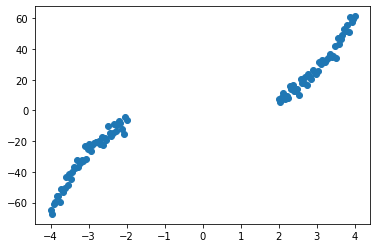

In [3]:
x, y, x_test = generate_data(number_of_points=50, noise_variance=9)

plt.scatter(x, y)
plt.show()

## Regularization

**Question**: At what regularization level does good epistemic uncertainty behavior collapse?

### Setup NLM

In [4]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

width = [50,50] # using the architecture used in the paper
hidden_layers = len(width)
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = NLM(architecture, random=random)
print('Number of parameters =',nn.D)

###define design choices in gradient descent
params = {'step_size':1e-2, 
          'max_iteration':5000, 
          'random_restarts':1}

Number of parameters = 2701


In [5]:
prior_var = 5**2
noise_var = 3

### Regularziation Parameter Search

In [5]:
reg_params = [0, 0.001, 0.01, 0.1, 1, 10, 50, 100]

In [6]:
nlms = []

for reg_param in reg_params:
    print("Regulariation parameter: {}".format(reg_param))
    params['reg_param'] = reg_param
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Regulariation parameter: 0
Iteration 0 loss 6061.684464525942; gradient mag: 12643.87780362635
Iteration 100 loss 25.70392070897872; gradient mag: 44.77331227113859
Iteration 200 loss 11.78873098087655; gradient mag: 6.360066827352003
Iteration 300 loss 10.93836406836984; gradient mag: 7.150838549025119
Iteration 400 loss 10.340999739564992; gradient mag: 6.4523616022658725
Iteration 500 loss 9.593672381641921; gradient mag: 7.901524329767645
Iteration 600 loss 8.766761030416795; gradient mag: 5.778196478802161
Iteration 700 loss 8.591436263006862; gradient mag: 5.846591240045981
Iteration 800 loss 8.49931335166038; gradient mag: 5.031703980162111
Iteration 900 loss 8.412423603760121; gradient mag: 2.709215552154896
Iteration 1000 loss 8.336056091227292; gradient mag: 3.771250858498092
Iteration 1100 loss 8.270536986955179; gradient mag: 3.9495271705201698
Iteration 1200 loss 8.217441982315714; gradient mag: 3.652836961462691
Iteration 1300 loss 8.177049198612178; gradient mag: 5.88887

Iteration 1500 loss 7.999940138525779; gradient mag: 10.57786639865204
Iteration 1600 loss 8.003034711356998; gradient mag: 23.114066739643132
Iteration 1700 loss 8.015903405221183; gradient mag: 25.658208396534487
Iteration 1800 loss 7.995214826510466; gradient mag: 12.968912162067042
Iteration 1900 loss 8.000987450319318; gradient mag: 30.832188944846003
Iteration 2000 loss 7.994080703441265; gradient mag: 16.5062926936259
Iteration 2100 loss 7.985505941715334; gradient mag: 12.05213202050454
Iteration 2200 loss 8.043124705448372; gradient mag: 56.31324592295215
Iteration 2300 loss 8.046994217055564; gradient mag: 70.50620165838882
Iteration 2400 loss 7.9726884521438315; gradient mag: 10.981121314551297
Iteration 2500 loss 7.968575979382914; gradient mag: 16.993924541314367
Iteration 2600 loss 7.991326253780301; gradient mag: 45.520806251699156
Iteration 2700 loss 7.9747796021689545; gradient mag: 33.4388389002192
Iteration 2800 loss 8.00355565127819; gradient mag: 53.1529065368941
I

Iteration 3000 loss 8.801162897119704; gradient mag: 5.343644598601379
Iteration 3100 loss 8.80159180031957; gradient mag: 10.847121701367314
Iteration 3200 loss 8.800576971733658; gradient mag: 9.689079458199478
Iteration 3300 loss 8.796319953568347; gradient mag: 9.548398072628354
Iteration 3400 loss 8.811487462749557; gradient mag: 26.77668615322067
Iteration 3500 loss 8.847929415594912; gradient mag: 47.42444873701834
Iteration 3600 loss 9.008296748360813; gradient mag: 98.59747549024942
Iteration 3700 loss 8.787179514024706; gradient mag: 5.803953402794602
Iteration 3800 loss 8.807014648627689; gradient mag: 32.09688067568475
Iteration 3900 loss 8.786138323157651; gradient mag: 13.071781449157008
Iteration 4000 loss 8.802179606150801; gradient mag: 28.772641829243753
Iteration 4100 loss 8.844768073370213; gradient mag: 51.85625897727163
Iteration 4200 loss 9.172572043429506; gradient mag: 129.1933440791879
Iteration 4300 loss 9.05772005556212; gradient mag: 108.47020156554503
Iter

Iteration 4400 loss 30.670351114978065; gradient mag: 10.990976818171534
Iteration 4500 loss 30.352463812997502; gradient mag: 14.587834806868818
Iteration 4600 loss 30.022767004518144; gradient mag: 5.335788112925838
Iteration 4700 loss 29.71199058102725; gradient mag: 7.576305226977344
Iteration 4800 loss 29.38716989994839; gradient mag: 6.740099881429748
Iteration 4900 loss 29.095665616171004; gradient mag: 14.489870660401829

Regulariation parameter: 100
Iteration 0 loss 696.6411770970042; gradient mag: 3758.148380196671
Iteration 100 loss 90.29784034792397; gradient mag: 71.29874541059746
Iteration 200 loss 81.67193256769988; gradient mag: 4.1975023174594295
Iteration 300 loss 78.05323706420921; gradient mag: 5.278271317202526
Iteration 400 loss 75.35027319546622; gradient mag: 45.347159137768706
Iteration 500 loss 72.93095376538982; gradient mag: 68.36701121422486
Iteration 600 loss 70.5030773029933; gradient mag: 48.72227457547134
Iteration 700 loss 68.19167855992576; gradient m

### Trace Plots

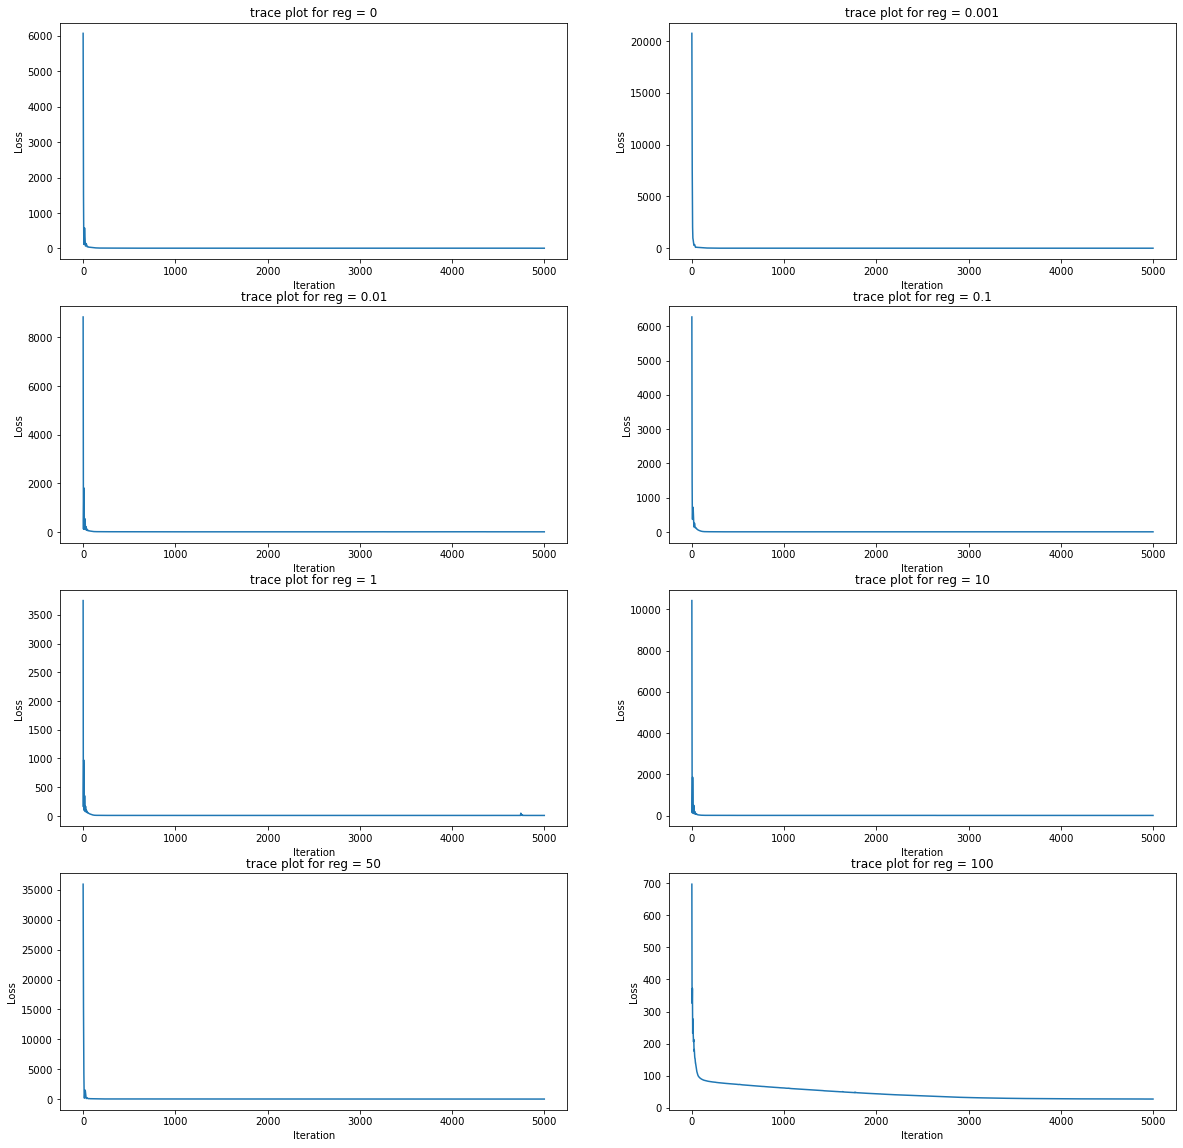

In [7]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    ax.plot(nlms[i].objective_trace)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')
    ax.set_title("trace plot for reg = {}".format(reg_params[i]))

plt.show()

### MAP Models

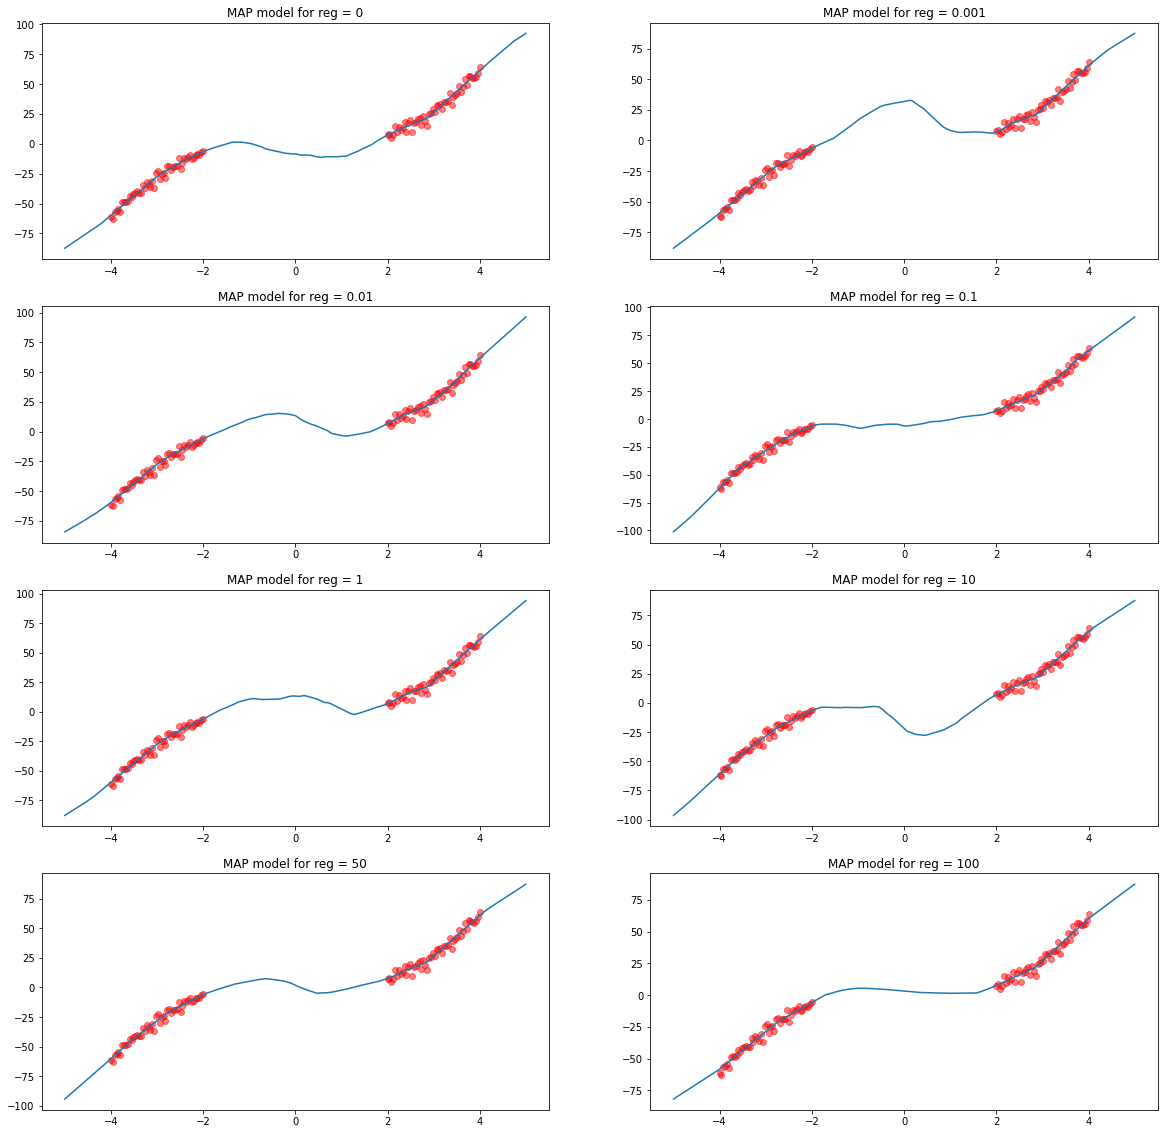

In [8]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_pred = nlm.forward(nlm.weights, x_test)

    ax.scatter(x, y, color = 'r', alpha = 0.5)
    ax.plot(x_test[0, :], y_pred.flatten())

    ax.set_title("MAP model for reg = {}".format(reg_params[i]))

plt.show()

### Prior Samples

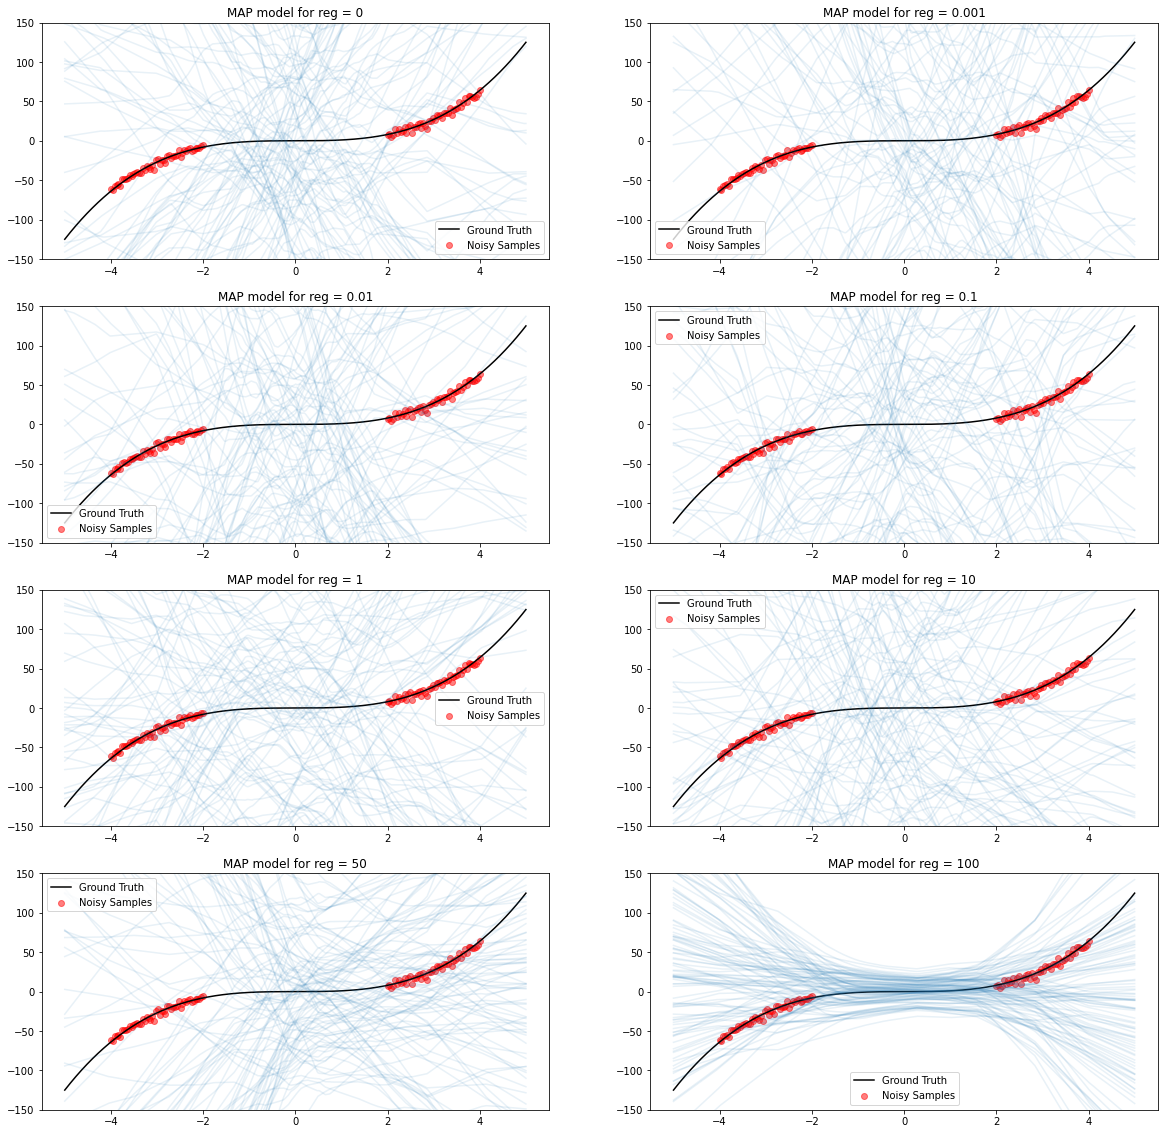

In [10]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = 0, w_prior_cov = prior_var, noise_var = noise_var)
        
    ax.scatter(x,y, color='red', alpha = 0.5, label='Noisy Samples')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("MAP model for reg = {}".format(reg_params[i]))

plt.show()

### Posterior Samples

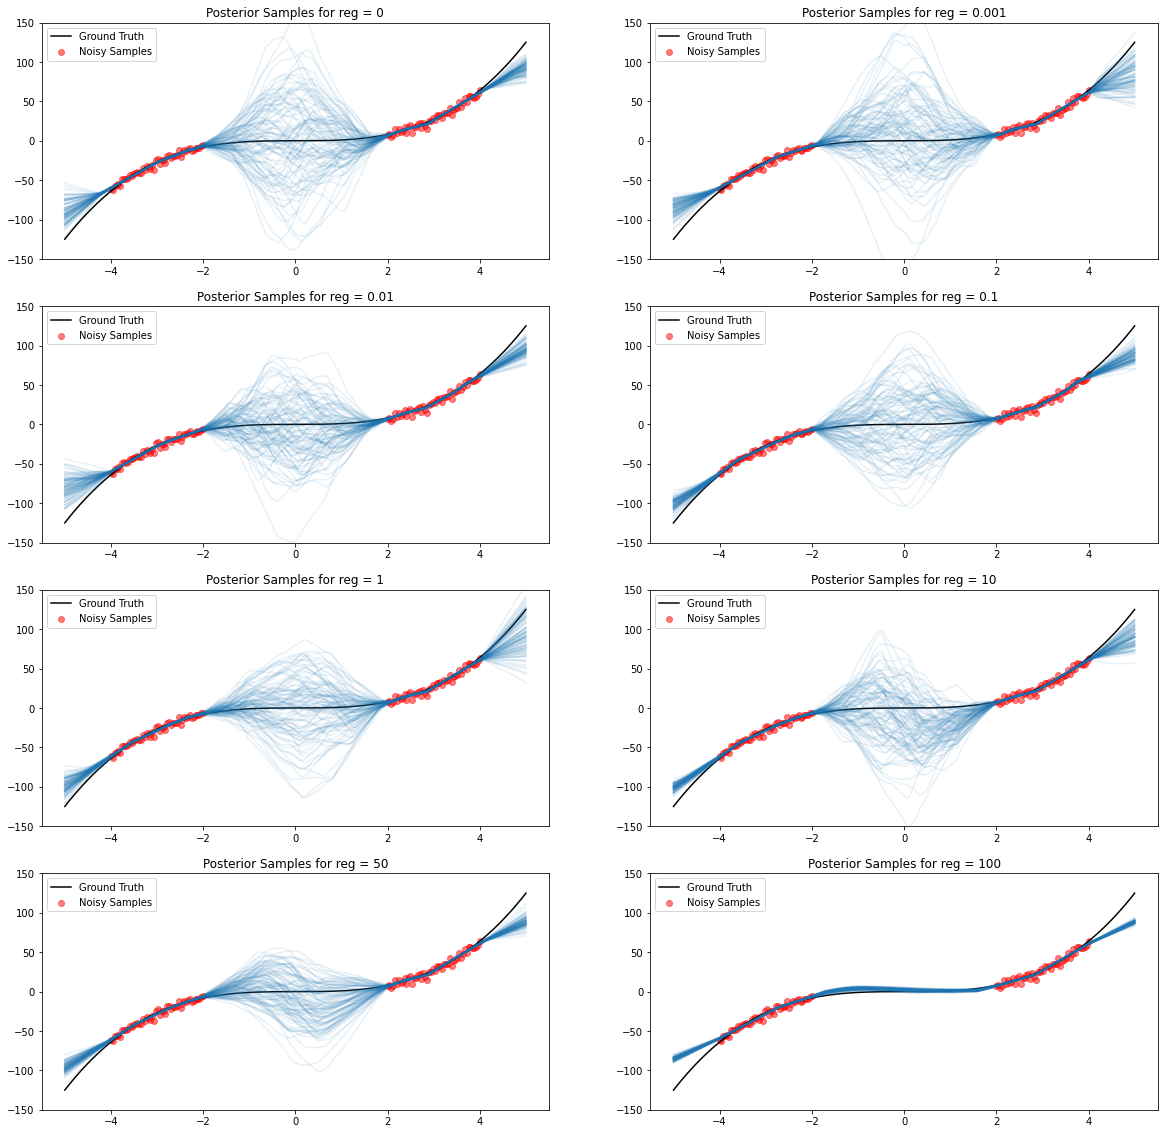

In [11]:
posteriors = []

fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    
    posteriors.append(y_posterior)
    
    ax.scatter(x, y, color='red', alpha = 0.5, label='Noisy Samples')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("Posterior Samples for reg = {}".format(reg_params[i]))

plt.show()

### Negative Log-Likelihood and Epistemic Uncertainty

In [12]:
# Compute neg_log_likelihood and epistemic uncertainty on test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = x_test_gap**3

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = x_test_non_gap**3

nlls_gap = []
eus_gap = []
nlls_non_gap = []
eus_non_gap = []

for nlm in nlms:
    posterior_predictive_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    posterior_predictive_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)

    nlls_gap.append(neg_log_likelihood(posterior_predictive_gap, y_test_gap, noise_var))
    eus_gap.append(epistemic_uncertainty(posterior_predictive_gap))

    nlls_non_gap.append(neg_log_likelihood(posterior_predictive_non_gap, y_test_non_gap, noise_var))
    eus_non_gap.append(epistemic_uncertainty(posterior_predictive_non_gap))

### Final Results

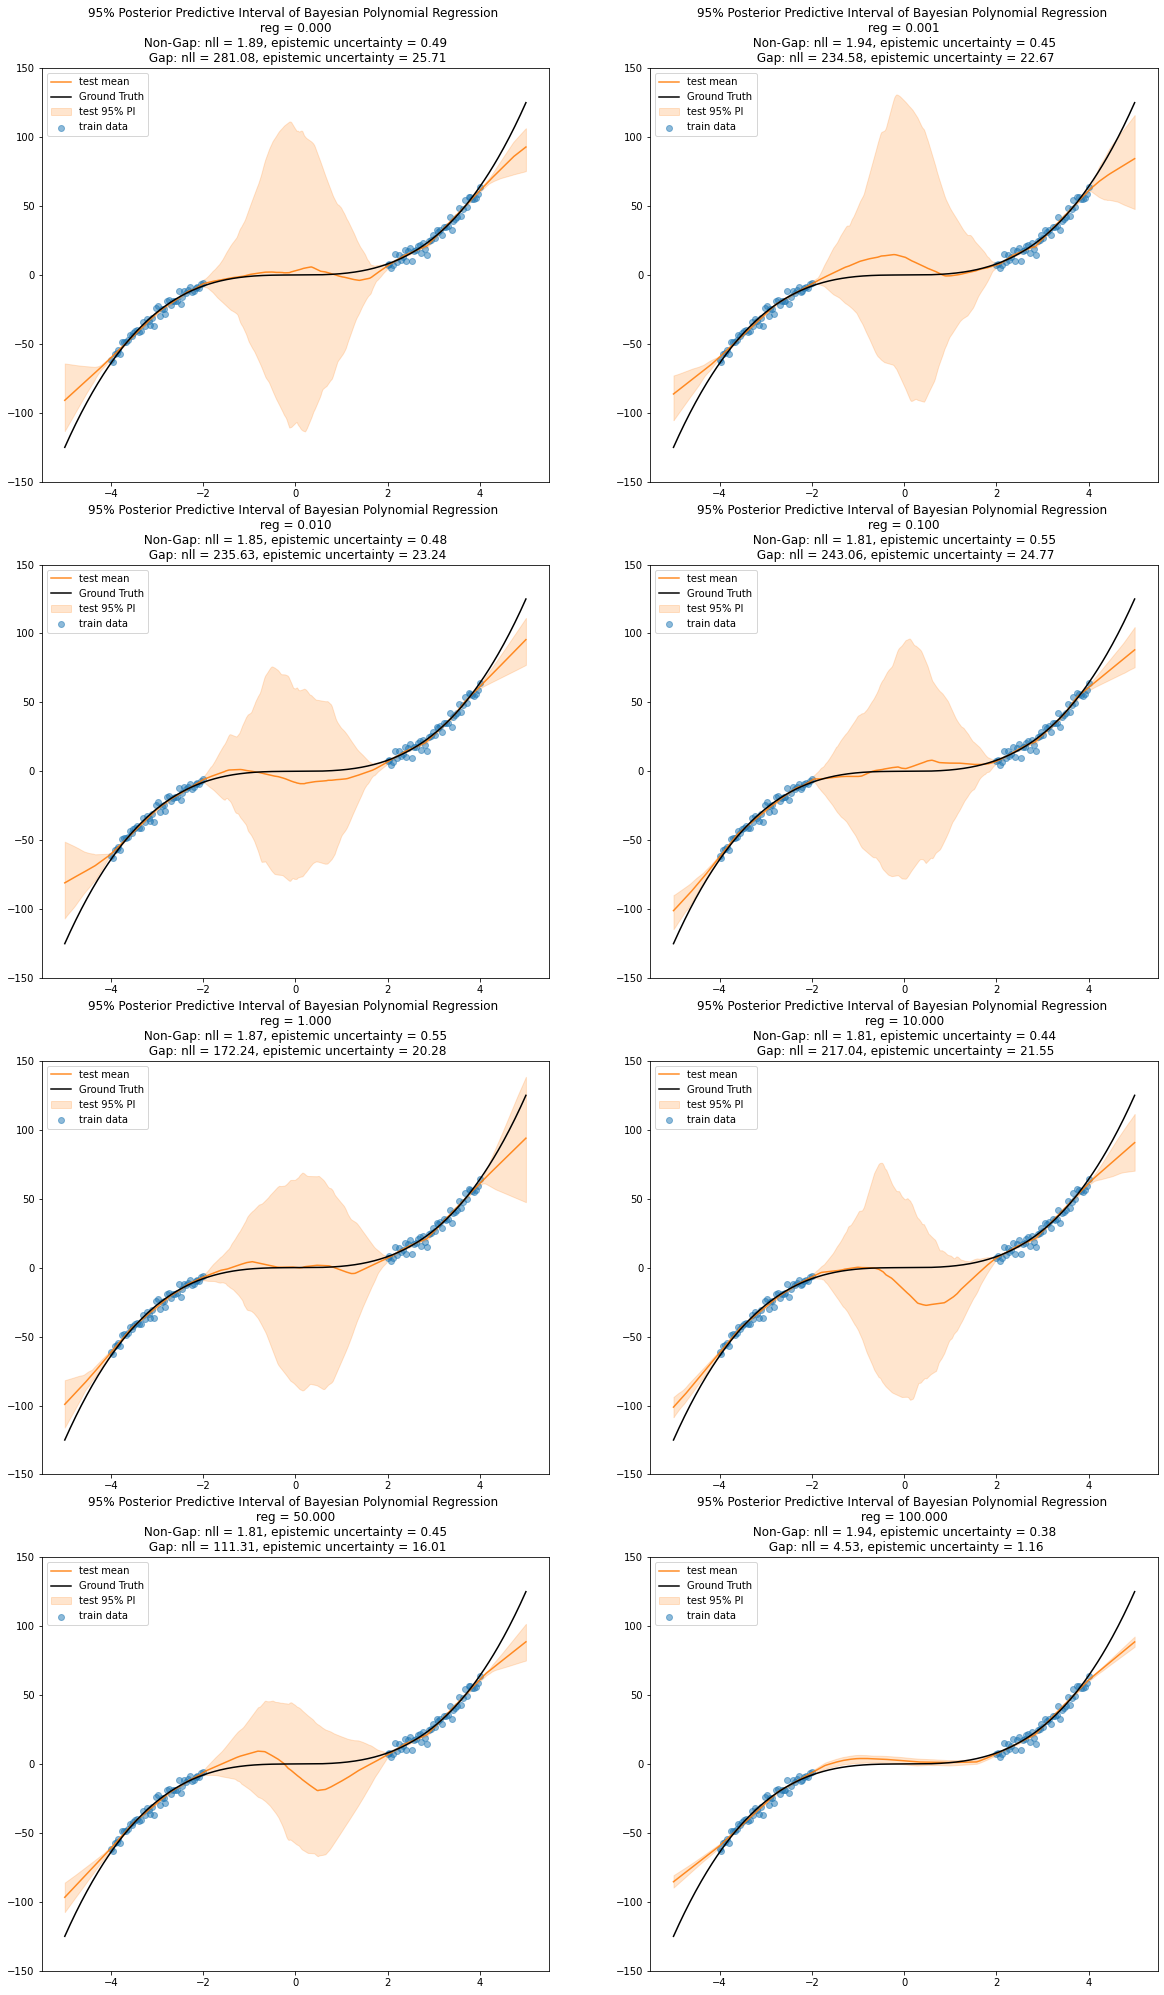

In [13]:
fig, axs = plt.subplots(4, 2, figsize = (20, 35))

for i, ax in enumerate(axs.ravel()):
    posterior = posteriors[i]
    
    # Calulating percentiles
    pp_upper = np.percentile(posterior, 97.5, axis=0)
    pp_lower = np.percentile(posterior, 2.5, axis=0)
    pp_mean = np.mean(posterior, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test[0,:], pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval of Bayesian Polynomial Regression \n reg = {:.3f} \n Non-Gap: nll = {:.2f}, epistemic uncertainty = {:.2f} \n Gap: nll = {:.2f}, epistemic uncertainty = {:.2f}".format(reg_params[i], nlls_non_gap[i], eus_non_gap[i], nlls_gap[i], eus_gap[i]))

plt.show()

It does appear that the better (more symmetric) uncertainty behavior in the gap gives smaller (larger magnitude) negative log likelihoods. However, these are still much smaller than when using higher regularization values. 

### Regularization Parameters: [1, 50]

In [14]:
reg_params = [1, 5, 10, 15, 20, 30, 40, 50]

In [15]:
nlms = []

for reg_param in reg_params:
    print("Regulariation parameter: {}".format(reg_param))
    params['reg_param'] = reg_param
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Regulariation parameter: 1
Iteration 0 loss 12893.149698235884; gradient mag: 15519.72673043238
Iteration 100 loss 34.76280912245856; gradient mag: 40.771099141475105
Iteration 200 loss 8.828708145900343; gradient mag: 19.127597376535366
Iteration 300 loss 8.521610304726938; gradient mag: 6.857292873722646
Iteration 400 loss 8.491195556205582; gradient mag: 13.652884399168602
Iteration 500 loss 8.458814332390325; gradient mag: 4.337345429808431
Iteration 600 loss 8.4436351638634; gradient mag: 6.477138988174938
Iteration 700 loss 8.437176438892212; gradient mag: 7.119225946385815
Iteration 800 loss 8.433517325745838; gradient mag: 9.41015557198754
Iteration 900 loss 8.417403460761484; gradient mag: 2.291365181347126
Iteration 1000 loss 8.43288648207029; gradient mag: 17.199439499909257
Iteration 1100 loss 8.410891137762258; gradient mag: 2.252796502639927
Iteration 1200 loss 8.4429382914312; gradient mag: 20.618020231719374
Iteration 1300 loss 8.406036868317027; gradient mag: 3.7218439

Iteration 1400 loss 15.199388049351484; gradient mag: 9.924135250872062
Iteration 1500 loss 15.169560239078269; gradient mag: 3.2347674141649545
Iteration 1600 loss 15.146870273150348; gradient mag: 29.880133664448827
Iteration 1700 loss 15.106544567376183; gradient mag: 21.15791626534783
Iteration 1800 loss 15.071964085315386; gradient mag: 22.69204613377223
Iteration 1900 loss 15.05886081472132; gradient mag: 28.504474719488503
Iteration 2000 loss 14.982513605278726; gradient mag: 19.707649957268803
Iteration 2100 loss 14.925288848358878; gradient mag: 11.612371829199477
Iteration 2200 loss 14.869639850769957; gradient mag: 9.192769241455883
Iteration 2300 loss 14.845937166725045; gradient mag: 21.0115163883932
Iteration 2400 loss 14.805027540250633; gradient mag: 9.00268841895008
Iteration 2500 loss 15.026006894631093; gradient mag: 103.08208684824363
Iteration 2600 loss 14.720517377068678; gradient mag: 13.97229130553576
Iteration 2700 loss 14.70239344853234; gradient mag: 31.19240

Iteration 2800 loss 19.48500594017498; gradient mag: 3.4321868513466898
Iteration 2900 loss 19.372508992958178; gradient mag: 14.395731866477034
Iteration 3000 loss 19.259708815846484; gradient mag: 9.208087365489066
Iteration 3100 loss 19.137611629754236; gradient mag: 4.423100830872102
Iteration 3200 loss 19.025908152529578; gradient mag: 7.387354389336269
Iteration 3300 loss 18.90791400390732; gradient mag: 9.969123213235362
Iteration 3400 loss 18.793682418666307; gradient mag: 3.7542130220088303
Iteration 3500 loss 18.676414702184406; gradient mag: 13.020523976638543
Iteration 3600 loss 18.555047249725426; gradient mag: 14.35428433376986
Iteration 3700 loss 18.43244682099283; gradient mag: 7.10186871833492
Iteration 3800 loss 18.33881267319692; gradient mag: 35.67258133508642
Iteration 3900 loss 18.53515270973594; gradient mag: 112.89847802492567
Iteration 4000 loss 18.0635058985183; gradient mag: 6.291401082320667
Iteration 4100 loss 18.02719684636571; gradient mag: 57.48605663927

Iteration 4200 loss 29.77715088736856; gradient mag: 52.57497545213589
Iteration 4300 loss 29.51218062749884; gradient mag: 11.898383906141094
Iteration 4400 loss 29.283011137542967; gradient mag: 14.76004055338739
Iteration 4500 loss 29.07183265162005; gradient mag: 25.68808148693027
Iteration 4600 loss 28.865423131819092; gradient mag: 44.179443712608666
Iteration 4700 loss 28.612406155302864; gradient mag: 32.37092529196434
Iteration 4800 loss 28.369805655163727; gradient mag: 7.407917344041727
Iteration 4900 loss 28.14459318581983; gradient mag: 10.793637408956519

Regulariation parameter: 50
Iteration 0 loss 7065.225587593209; gradient mag: 16056.25679141789
Iteration 100 loss 72.19682837587521; gradient mag: 55.396375886367444
Iteration 200 loss 55.60683555762818; gradient mag: 18.031173246011885
Iteration 300 loss 47.938173523717154; gradient mag: 16.34708612792036
Iteration 400 loss 47.21324834026165; gradient mag: 17.38824625407763
Iteration 500 loss 46.723537907800775; gradie

In [16]:
# Compute neg_log_likelihood and epistemic uncertainty on test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = x_test_gap**3

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = x_test_non_gap**3

nlls_gap = []
eus_gap = []
nlls_non_gap = []
eus_non_gap = []

for nlm in nlms:
    posterior_predictive_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    posterior_predictive_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)

    nlls_gap.append(neg_log_likelihood(posterior_predictive_gap, y_test_gap, noise_var))
    eus_gap.append(epistemic_uncertainty(posterior_predictive_gap))

    nlls_non_gap.append(neg_log_likelihood(posterior_predictive_non_gap, y_test_non_gap, noise_var))
    eus_non_gap.append(epistemic_uncertainty(posterior_predictive_non_gap))

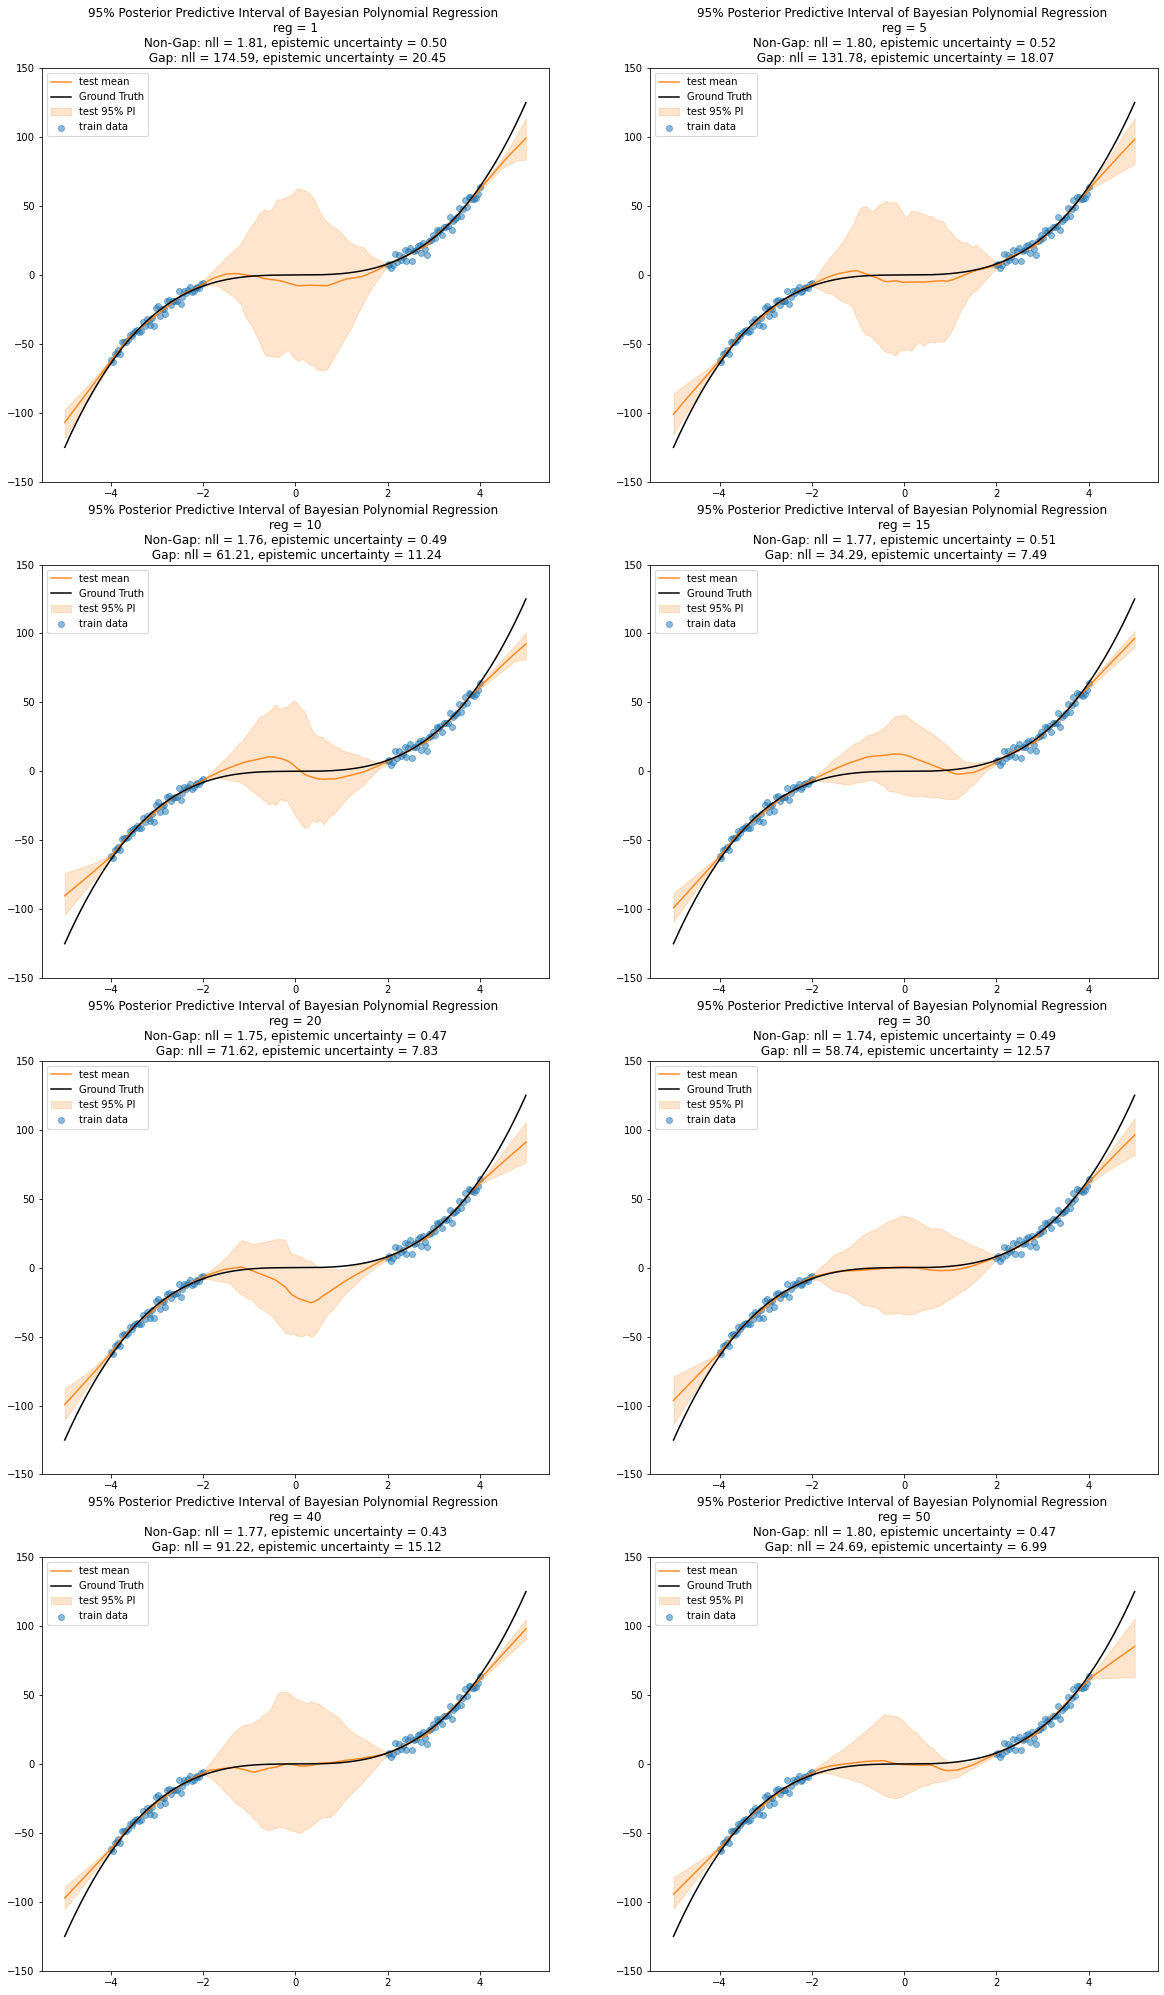

In [17]:
fig, axs = plt.subplots(4, 2, figsize = (20, 35))

for i, ax in enumerate(axs.ravel()):  
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)

    # Calulating percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test[0,:], pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval of Bayesian Polynomial Regression \n reg = {:.0f} \n Non-Gap: nll = {:.2f}, epistemic uncertainty = {:.2f} \n Gap: nll = {:.2f}, epistemic uncertainty = {:.2f}".format(reg_params[i], nlls_non_gap[i], eus_non_gap[i], nlls_gap[i], eus_gap[i]))

plt.show()

### Regularization Parameters: [60, 150]

In [18]:
reg_params = [60, 70, 80, 90, 100, 150]

In [19]:
nlms = []

for reg_param in reg_params:
    print("Regulariation parameter: {}".format(reg_param))
    params['reg_param'] = reg_param
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Regulariation parameter: 60
Iteration 0 loss 355.5465131681993; gradient mag: 984.5558305033613
Iteration 100 loss 57.362004996284384; gradient mag: 11.884538925949016
Iteration 200 loss 50.6915923072315; gradient mag: 29.08086710604304
Iteration 300 loss 48.36973368787397; gradient mag: 39.17989056037777
Iteration 400 loss 46.64954988804692; gradient mag: 38.358248888889776
Iteration 500 loss 45.0938657617547; gradient mag: 20.9699078991147
Iteration 600 loss 43.84103549706559; gradient mag: 57.09670380806392
Iteration 700 loss 42.45004276413038; gradient mag: 23.998909830998983
Iteration 800 loss 41.323107859958014; gradient mag: 39.28419737197097
Iteration 900 loss 40.17787332280432; gradient mag: 28.287805264071917
Iteration 1000 loss 39.12186083815242; gradient mag: 38.87465448779683
Iteration 1100 loss 38.05371273214803; gradient mag: 29.23548872760065
Iteration 1200 loss 37.10144347777023; gradient mag: 37.12802521443785
Iteration 1300 loss 36.058970964226056; gradient mag: 17.7

Iteration 1400 loss 38.48108869168913; gradient mag: 6.789633369280034
Iteration 1500 loss 36.9974528736297; gradient mag: 30.37188169201559
Iteration 1600 loss 35.4984306296882; gradient mag: 5.306952854477507
Iteration 1700 loss 34.17079226420195; gradient mag: 13.229063985132598
Iteration 1800 loss 32.922854459830646; gradient mag: 11.165784037140048
Iteration 1900 loss 31.850922401777183; gradient mag: 33.44914962610889
Iteration 2000 loss 30.754794482645792; gradient mag: 3.540450325368437
Iteration 2100 loss 29.82857457742358; gradient mag: 6.039454976560733
Iteration 2200 loss 28.99529516436943; gradient mag: 7.070909257472184
Iteration 2300 loss 28.261900106933904; gradient mag: 6.64126339465586
Iteration 2400 loss 27.607076820439367; gradient mag: 10.588695903721762
Iteration 2500 loss 27.005175459317613; gradient mag: 3.986422670950681
Iteration 2600 loss 26.50923802159496; gradient mag: 3.763765581772186
Iteration 2700 loss 26.084063498259447; gradient mag: 4.770722675546671

Iteration 2900 loss 42.336430018993035; gradient mag: 4.595815599361817
Iteration 3000 loss 41.61964377904772; gradient mag: 5.671983856876203
Iteration 3100 loss 40.92436263377989; gradient mag: 9.489019783258264
Iteration 3200 loss 40.24100946121233; gradient mag: 2.8154707148065405
Iteration 3300 loss 39.582604114877626; gradient mag: 4.331013257717466
Iteration 3400 loss 38.94351745391884; gradient mag: 5.166875575464446
Iteration 3500 loss 38.320962485461415; gradient mag: 4.110137467607208
Iteration 3600 loss 37.71609908919987; gradient mag: 2.2741687638661
Iteration 3700 loss 37.134653607754565; gradient mag: 7.4386235165030925
Iteration 3800 loss 36.57052336073036; gradient mag: 9.216992552113613
Iteration 3900 loss 35.92742063328553; gradient mag: 4.381696969286495
Iteration 4000 loss 35.62384403924328; gradient mag: 45.75350919139407
Iteration 4100 loss 34.78976230968273; gradient mag: 3.2124831601537642
Iteration 4200 loss 34.269456898116815; gradient mag: 3.3339160899906815

In [20]:
# Compute neg_log_likelihood and epistemic uncertainty on test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = x_test_gap**3

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = x_test_non_gap**3

nlls_gap = []
eus_gap = []
nlls_non_gap = []
eus_non_gap = []

for nlm in nlms:
    posterior_predictive_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    posterior_predictive_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)

    nlls_gap.append(neg_log_likelihood(posterior_predictive_gap, y_test_gap, noise_var))
    eus_gap.append(epistemic_uncertainty(posterior_predictive_gap))

    nlls_non_gap.append(neg_log_likelihood(posterior_predictive_non_gap, y_test_non_gap, noise_var))
    eus_non_gap.append(epistemic_uncertainty(posterior_predictive_non_gap))

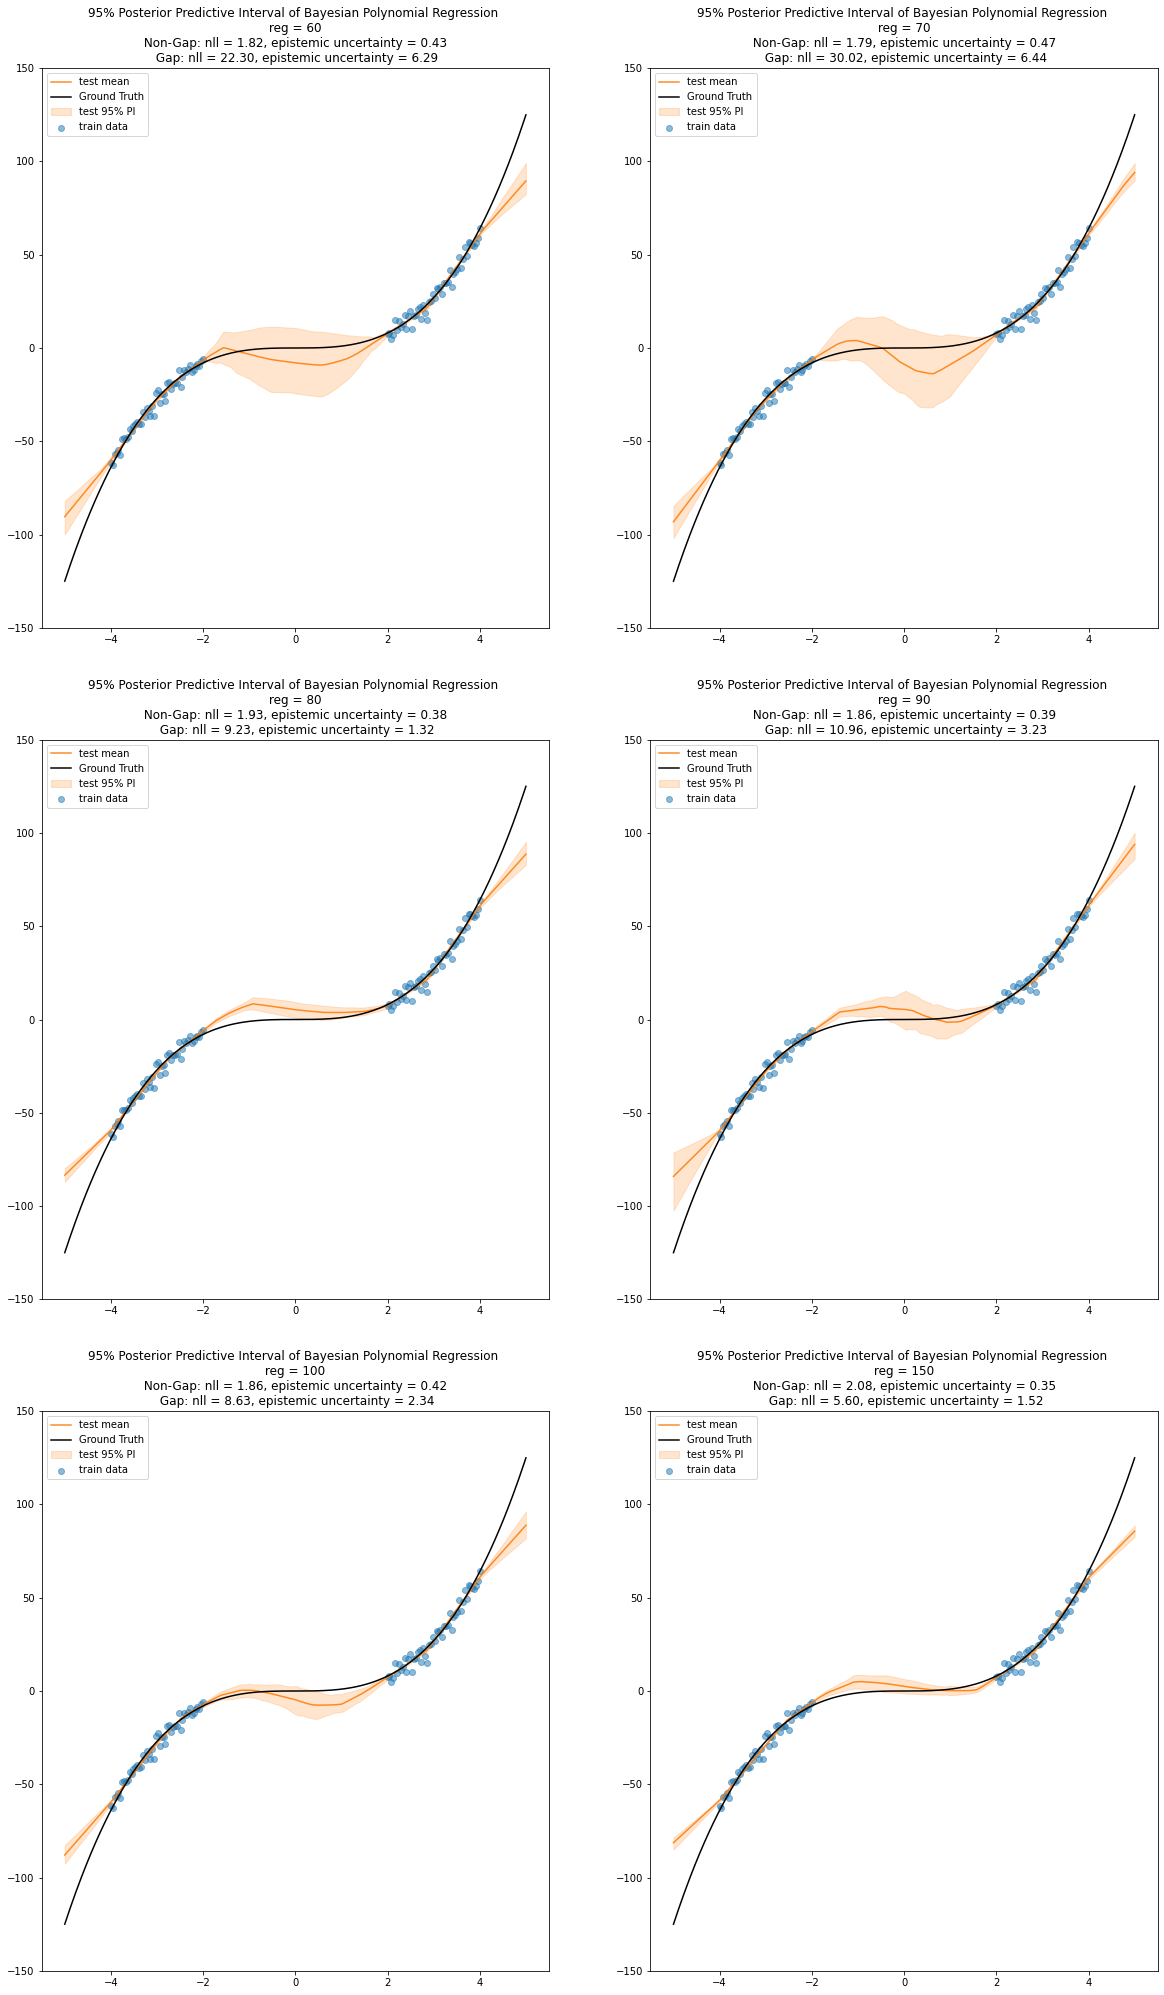

In [21]:
fig, axs = plt.subplots(3, 2, figsize = (20, 35))

for i, ax in enumerate(axs.ravel()):  
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)

    # Calulating percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test[0,:], pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval of Bayesian Polynomial Regression \n reg = {:.0f} \n Non-Gap: nll = {:.2f}, epistemic uncertainty = {:.2f} \n Gap: nll = {:.2f}, epistemic uncertainty = {:.2f}".format(reg_params[i], nlls_non_gap[i], eus_non_gap[i], nlls_gap[i], eus_gap[i]))

plt.show()

## Random State

**Question:** How often does NLM result in good epsistemic uncertainty? 

### Regularization Parameter = 10

In [5]:
rand_states = np.random.randint(0, 1e5, size = 20)
rand_states

array([15689, 96761,  3299, 16406, 82932, 80697, 55038,  9264, 33490,
       90629, 29375, 79482, 31901, 10498, 12294, 40476, 20921, 98900,
       66517, 12702])

In [6]:
nlms = []

params['reg_param'] = 10

for rand_state in rand_states:
    print("Random seed: {}".format(rand_state))
    random = np.random.RandomState(rand_state)
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Random seed: 15689
Iteration 0 loss 2006.4519562221917; gradient mag: 7596.315801125808
Iteration 100 loss 18.79313860368334; gradient mag: 28.707778254748483
Iteration 200 loss 15.885366792508671; gradient mag: 4.498956389731498
Iteration 300 loss 15.560420661040387; gradient mag: 4.639326299948725
Iteration 400 loss 15.370991189958055; gradient mag: 10.931048640871849
Iteration 500 loss 15.261971443492214; gradient mag: 31.96583616299323
Iteration 600 loss 15.131641380263698; gradient mag: 16.0197673472851
Iteration 700 loss 15.022537665385165; gradient mag: 10.41821136503485
Iteration 800 loss 14.942852521748382; gradient mag: 12.368730094177291
Iteration 900 loss 14.85083728473013; gradient mag: 26.57248139748061
Iteration 1000 loss 14.762655483835244; gradient mag: 15.530052545347184
Iteration 1100 loss 14.6973162836785; gradient mag: 11.785762467575971
Iteration 1200 loss 14.63952350464096; gradient mag: 18.50989051272028
Iteration 1300 loss 14.564814063362029; gradient mag: 20.9

Iteration 1400 loss 15.078488582471678; gradient mag: 61.55163966747418
Iteration 1500 loss 14.976473394271752; gradient mag: 45.99544942056019
Iteration 1600 loss 14.909005181773153; gradient mag: 43.08008506698774
Iteration 1700 loss 14.828621882438341; gradient mag: 15.534686556999842
Iteration 1800 loss 15.570383333723779; gradient mag: 225.30172140895834
Iteration 1900 loss 14.709681453093829; gradient mag: 16.291478409194156
Iteration 2000 loss 14.64815339268104; gradient mag: 15.29238911902315
Iteration 2100 loss 14.720290799246827; gradient mag: 80.38906094490255
Iteration 2200 loss 15.0114746342846; gradient mag: 127.10026112634587
Iteration 2300 loss 14.582961680763995; gradient mag: 2.4977095450051348
Iteration 2400 loss 14.519726761842804; gradient mag: 2.0845632824386793
Iteration 2500 loss 14.455921232248889; gradient mag: 8.034245740644279
Iteration 2600 loss 14.396761632571632; gradient mag: 1.8919713119880655
Iteration 2700 loss 14.342161901711172; gradient mag: 3.5495

Iteration 2800 loss 13.519981975887896; gradient mag: 16.433125217763095
Iteration 2900 loss 13.395466262087718; gradient mag: 9.149799014184573
Iteration 3000 loss 13.33343269904912; gradient mag: 6.499251771089762
Iteration 3100 loss 13.385375952900297; gradient mag: 58.96192821147836
Iteration 3200 loss 13.227675873728415; gradient mag: 10.260621903016103
Iteration 3300 loss 13.217974282134183; gradient mag: 40.383095283030016
Iteration 3400 loss 13.142326214636391; gradient mag: 38.46563055508423
Iteration 3500 loss 13.213092293215565; gradient mag: 76.2641601885008
Iteration 3600 loss 13.04661482959001; gradient mag: 40.34531010048537
Iteration 3700 loss 13.067823958507311; gradient mag: 63.88512755820614
Iteration 3800 loss 12.913740973062161; gradient mag: 14.134164089205132
Iteration 3900 loss 12.879724061923529; gradient mag: 23.398794047236112
Iteration 4000 loss 12.935804991396758; gradient mag: 64.12443578113472
Iteration 4100 loss 13.532062454959878; gradient mag: 160.0647

Iteration 4200 loss 13.913591018443142; gradient mag: 6.534735761093773
Iteration 4300 loss 13.882971099822317; gradient mag: 14.679175983722368
Iteration 4400 loss 13.83192667640989; gradient mag: 18.05330819210604
Iteration 4500 loss 14.021452456254046; gradient mag: 87.64621286101708
Iteration 4600 loss 13.727736809869505; gradient mag: 17.30860345261887
Iteration 4700 loss 13.683720056114272; gradient mag: 15.256965579247838
Iteration 4800 loss 13.65867520401172; gradient mag: 33.316938709009406
Iteration 4900 loss 13.896444329921142; gradient mag: 94.64551904601558

Random seed: 9264
Iteration 0 loss 2977.3581217328447; gradient mag: 12260.998555287173
Iteration 100 loss 16.991791711543843; gradient mag: 37.19774601097703
Iteration 200 loss 15.662457761625838; gradient mag: 6.082094164483286
Iteration 300 loss 15.288905090744183; gradient mag: 6.2446709824134
Iteration 400 loss 15.10428305526803; gradient mag: 4.989063814364466
Iteration 500 loss 14.941381119849652; gradient mag: 

Iteration 600 loss 16.017282719380518; gradient mag: 57.73144264676818
Iteration 700 loss 15.822107792403738; gradient mag: 18.501150817510474
Iteration 800 loss 15.744401843910218; gradient mag: 15.300644019507274
Iteration 900 loss 15.708081939000543; gradient mag: 32.898907311427664
Iteration 1000 loss 15.650102399773623; gradient mag: 6.1175871113677225
Iteration 1100 loss 15.617425785929136; gradient mag: 15.111937588422547
Iteration 1200 loss 15.57590711749084; gradient mag: 15.015512354906267
Iteration 1300 loss 15.680596554857816; gradient mag: 91.87840962142172
Iteration 1400 loss 15.506143779047434; gradient mag: 8.793686658591884
Iteration 1500 loss 15.475595929363866; gradient mag: 17.517948976128764
Iteration 1600 loss 15.453837648583194; gradient mag: 20.042821371265177
Iteration 1700 loss 15.565350125958021; gradient mag: 95.42017739797402
Iteration 1800 loss 15.401232421113608; gradient mag: 35.51385539179371
Iteration 1900 loss 15.361600416039941; gradient mag: 5.68111

Iteration 2000 loss 14.57878273719382; gradient mag: 6.943052029116555
Iteration 2100 loss 14.52413008789651; gradient mag: 4.772053740013988
Iteration 2200 loss 14.470915554182696; gradient mag: 7.764672813989913
Iteration 2300 loss 14.416267697197593; gradient mag: 6.52123864645821
Iteration 2400 loss 14.361986604887665; gradient mag: 8.131207196798108
Iteration 2500 loss 14.307615876949669; gradient mag: 3.3282751525926173
Iteration 2600 loss 14.253767425500882; gradient mag: 5.65024846291459
Iteration 2700 loss 14.172069964384624; gradient mag: 4.039358151255592
Iteration 2800 loss 14.10663063064231; gradient mag: 13.868896707427334
Iteration 2900 loss 14.045171805654206; gradient mag: 5.4944393855669755
Iteration 3000 loss 14.048843389887967; gradient mag: 58.18905243264294
Iteration 3100 loss 13.950694536133902; gradient mag: 42.44914294490772
Iteration 3200 loss 15.535532153375943; gradient mag: 286.0629099556931
Iteration 3300 loss 13.809254473724453; gradient mag: 3.1033472329

Iteration 3400 loss 13.513392330592497; gradient mag: 17.514625017226344
Iteration 3500 loss 13.478013321914226; gradient mag: 27.74036825977853
Iteration 3600 loss 13.459072531754975; gradient mag: 44.19760667931672
Iteration 3700 loss 14.121205550620463; gradient mag: 159.71191636296436
Iteration 3800 loss 13.331918394033048; gradient mag: 23.71815369623918
Iteration 3900 loss 13.292525712122071; gradient mag: 29.665082256246542
Iteration 4000 loss 13.33044746593942; gradient mag: 64.77111112574649
Iteration 4100 loss 13.27804295794746; gradient mag: 60.644978373991115
Iteration 4200 loss 13.137336161190895; gradient mag: 15.08940865871673
Iteration 4300 loss 13.089737472746503; gradient mag: 14.170898774477312
Iteration 4400 loss 13.044198816742597; gradient mag: 7.139469607594597
Iteration 4500 loss 13.053581613022839; gradient mag: 43.590167728522694
Iteration 4600 loss 13.026673831046544; gradient mag: 50.700001114362685
Iteration 4700 loss 17.848956411096076; gradient mag: 339.9

Iteration 4800 loss 12.36681245367691; gradient mag: 44.84480103927457
Iteration 4900 loss 12.389562447741875; gradient mag: 55.20218166765386

Random seed: 20921
Iteration 0 loss 1009.2386967256641; gradient mag: 6058.367094381148
Iteration 100 loss 19.525888908165424; gradient mag: 37.341800597735556
Iteration 200 loss 16.095206909351894; gradient mag: 14.469514372995905
Iteration 300 loss 15.532013530422287; gradient mag: 13.319862954024554
Iteration 400 loss 15.350581768646402; gradient mag: 11.8449170958129
Iteration 500 loss 15.261594025706163; gradient mag: 5.870685053097834
Iteration 600 loss 15.197357156632805; gradient mag: 5.977735691787107
Iteration 700 loss 15.127157078036108; gradient mag: 5.59264748595863
Iteration 800 loss 15.089723012517137; gradient mag: 27.507596326684467
Iteration 900 loss 14.940565114819155; gradient mag: 4.412303160004883
Iteration 1000 loss 14.887654690251853; gradient mag: 23.321798543187974
Iteration 1100 loss 14.785772985272576; gradient mag: 

Iteration 1200 loss 15.118936926997453; gradient mag: 16.311141781372402
Iteration 1300 loss 15.07293287376346; gradient mag: 4.416950270685857
Iteration 1400 loss 15.045102822333412; gradient mag: 25.660789464066262
Iteration 1500 loss 15.013771371060514; gradient mag: 19.870367228728675
Iteration 1600 loss 14.949550067968843; gradient mag: 3.6635070780706807
Iteration 1700 loss 14.907016499758257; gradient mag: 4.865718860605611
Iteration 1800 loss 14.857246277550619; gradient mag: 18.105349703656834
Iteration 1900 loss 14.756912871776773; gradient mag: 19.593281037069616
Iteration 2000 loss 14.694637787217761; gradient mag: 38.62052757337936
Iteration 2100 loss 14.634185155590274; gradient mag: 11.755795566226697
Iteration 2200 loss 14.614833830265887; gradient mag: 34.781345954353434
Iteration 2300 loss 14.552745369234273; gradient mag: 29.557504583941686
Iteration 2400 loss 14.613204028042189; gradient mag: 79.10808798367826
Iteration 2500 loss 14.481835467348077; gradient mag: 39

In [9]:
# Compute neg_log_likelihood and epistemic uncertainty on test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = x_test_gap**3

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = x_test_non_gap**3

nlls_gap = []
eus_gap = []
nlls_non_gap = []
eus_non_gap = []

for nlm in nlms:
    posterior_predictive_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    posterior_predictive_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)

    nlls_gap.append(neg_log_likelihood(posterior_predictive_gap, y_test_gap, noise_var))
    eus_gap.append(epistemic_uncertainty(posterior_predictive_gap))

    nlls_non_gap.append(neg_log_likelihood(posterior_predictive_non_gap, y_test_non_gap, noise_var))
    eus_non_gap.append(epistemic_uncertainty(posterior_predictive_non_gap))

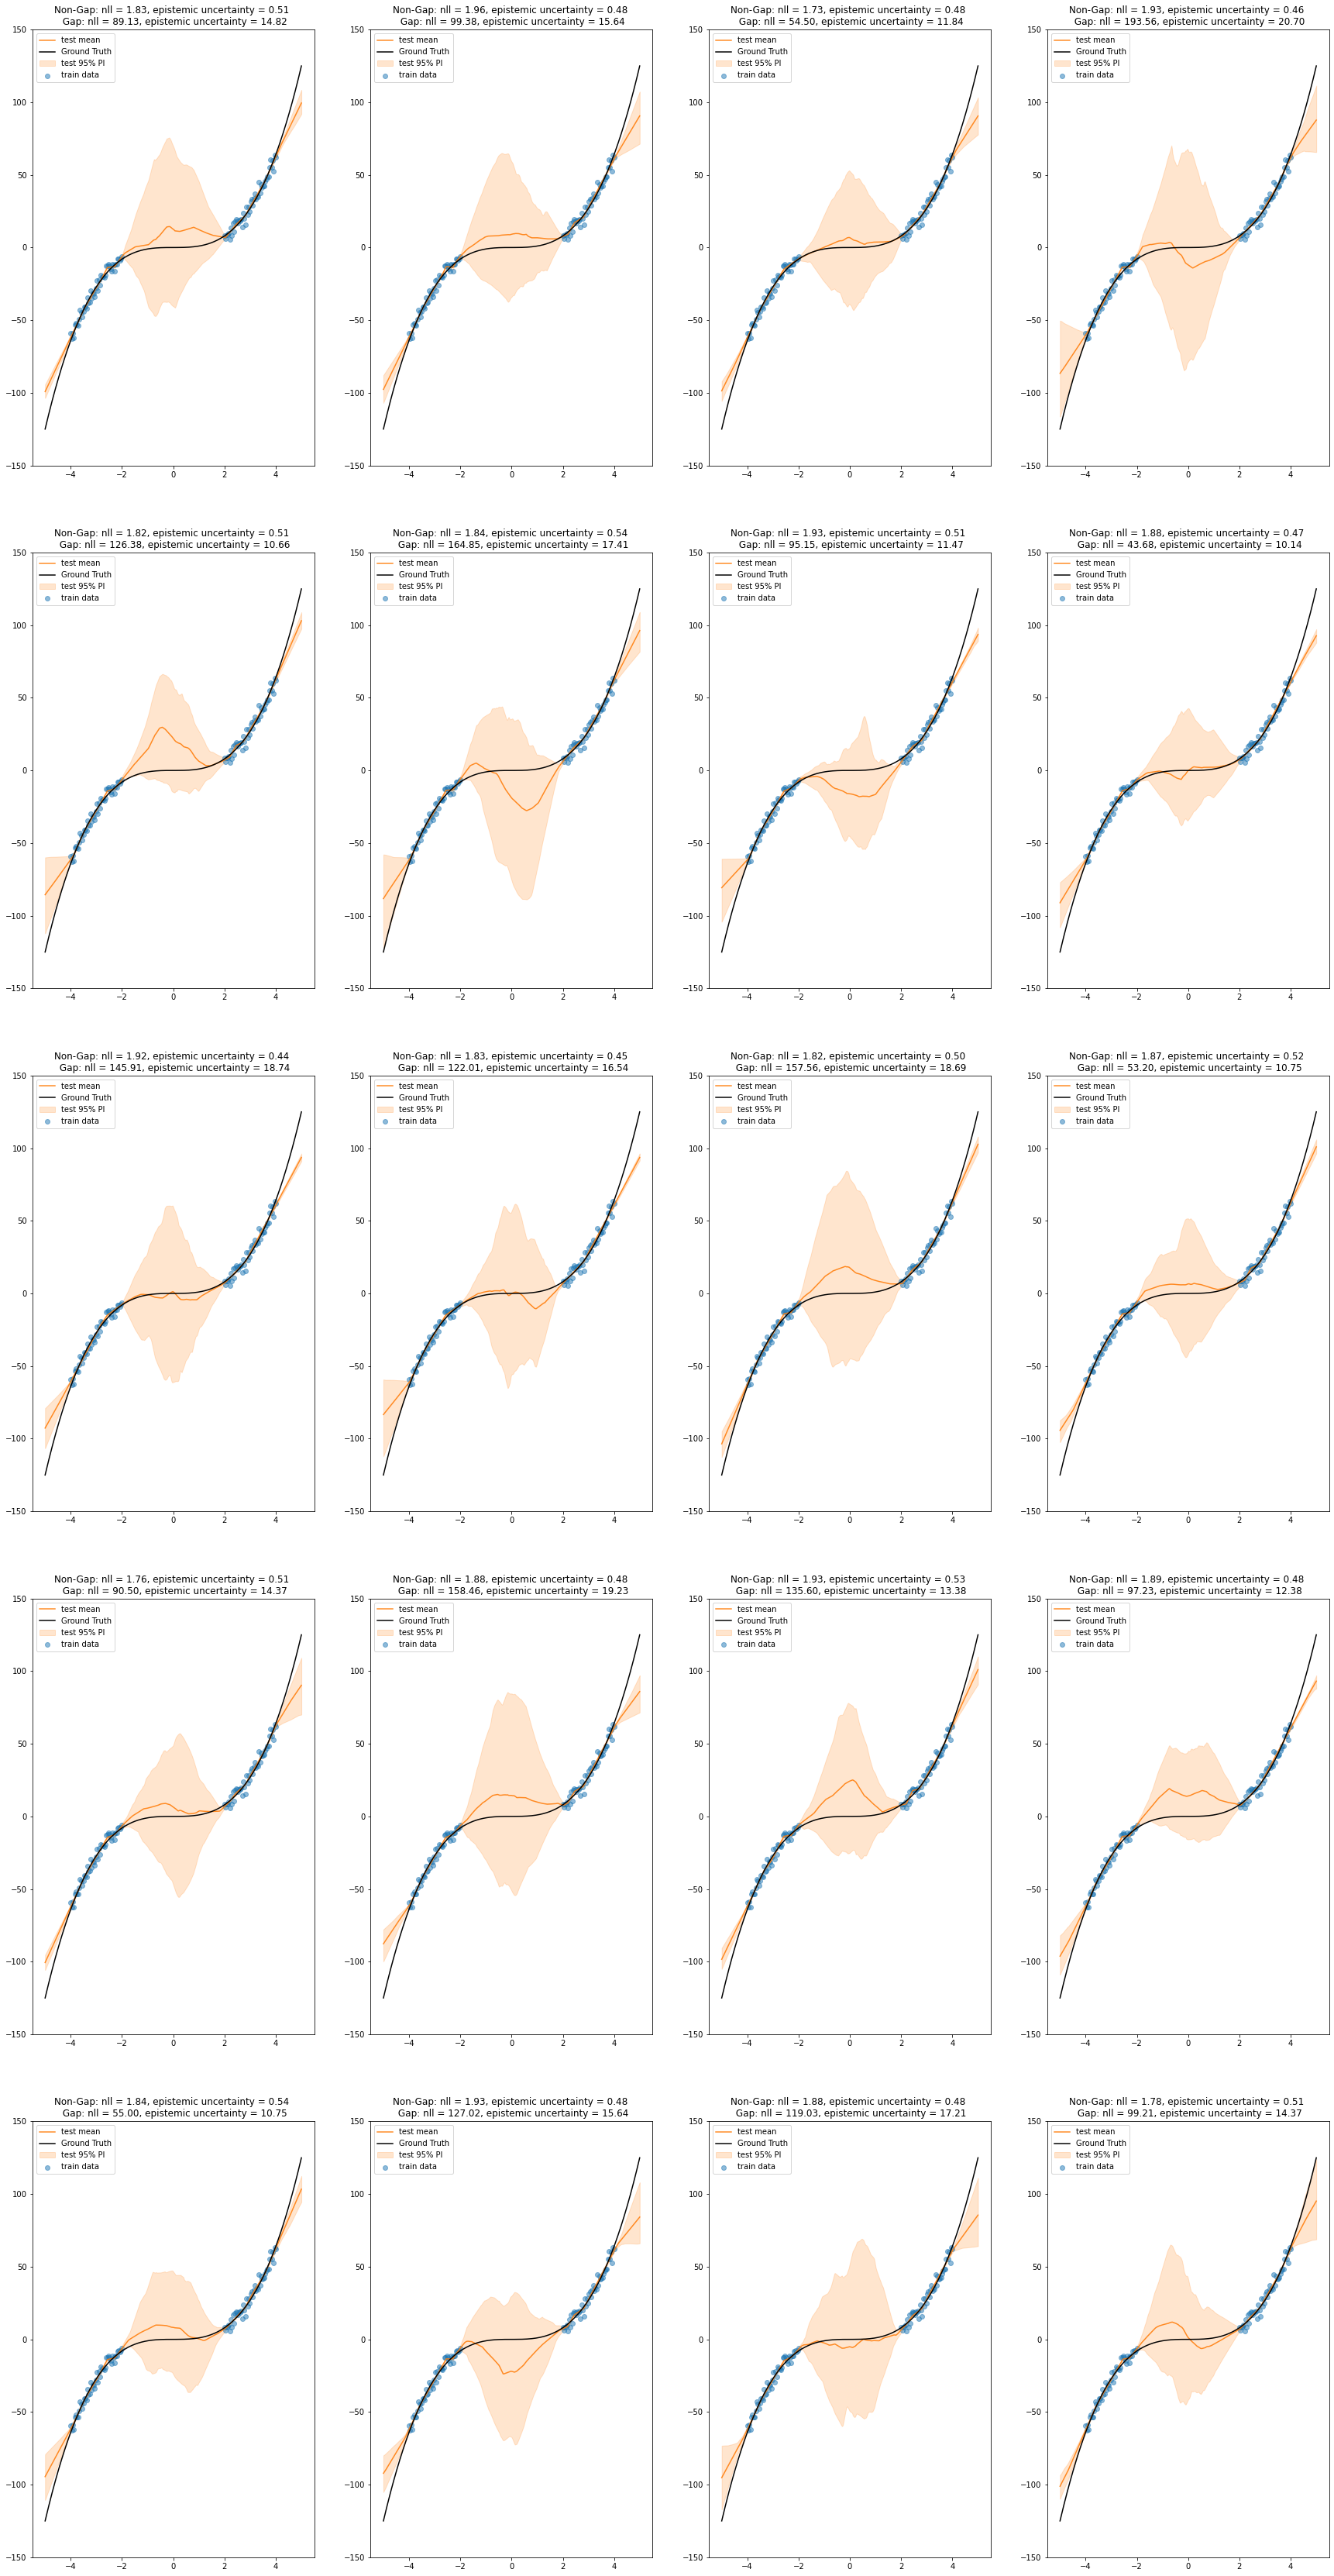

In [10]:
fig, axs = plt.subplots(5, 4, figsize = (30, 60))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    
    # Calulating percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test[0, :], pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test[0, :], pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test[0, :], x_test[0, :]**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("Non-Gap: nll = {:.2f}, epistemic uncertainty = {:.2f} \n Gap: nll = {:.2f}, epistemic uncertainty = {:.2f}".format(nlls_non_gap[i], eus_non_gap[i], nlls_gap[i], eus_gap[i]))

plt.show()

About 8 of the 20 models give what we would consider good epistemic uncertainty behaviors. 

### Regularization Parameter = 0

In [6]:
rand_states = np.random.randint(0, 1e5, size = 20)

params['reg_param'] = 0

nlms = []

for rand_state in rand_states:
    print("Random seed: {}".format(rand_state))
    random = np.random.RandomState(rand_state)
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Random seed: 29872
Iteration 0 loss 19667.625761646737; gradient mag: 35091.79397500938
Iteration 100 loss 35.99541787500898; gradient mag: 55.24280038354131
Iteration 200 loss 17.84808095862758; gradient mag: 20.541475108063587
Iteration 300 loss 13.433012219547566; gradient mag: 14.965348552617991
Iteration 400 loss 11.287022182667561; gradient mag: 8.22833476285481
Iteration 500 loss 9.69903519749458; gradient mag: 7.714915162986269
Iteration 600 loss 8.753887184269772; gradient mag: 4.283095736727937
Iteration 700 loss 8.130988266324373; gradient mag: 11.311757056626526
Iteration 800 loss 7.894980660797337; gradient mag: 4.295435515936039
Iteration 900 loss 7.766803591949962; gradient mag: 4.753577820025868
Iteration 1000 loss 7.690573361978607; gradient mag: 4.061463445972677
Iteration 1100 loss 7.630822008451671; gradient mag: 5.004351112581275
Iteration 1200 loss 7.434811015449331; gradient mag: 7.568588925430655
Iteration 1300 loss 7.323755758948059; gradient mag: 8.22571122273

Iteration 1500 loss 7.651491062495875; gradient mag: 20.242387416691308
Iteration 1600 loss 7.628227012781698; gradient mag: 4.100517659249244
Iteration 1700 loss 7.614387024441028; gradient mag: 3.221594157339976
Iteration 1800 loss 7.606475622430664; gradient mag: 7.077683439431535
Iteration 1900 loss 7.630692468095698; gradient mag: 39.73882701947377
Iteration 2000 loss 7.5808278705281795; gradient mag: 1.7223420987021885
Iteration 2100 loss 7.5745840534402875; gradient mag: 11.113669598888388
Iteration 2200 loss 7.5763252355031385; gradient mag: 22.36788714953427
Iteration 2300 loss 7.563934198491831; gradient mag: 15.239922111249792
Iteration 2400 loss 7.561216065869444; gradient mag: 20.512730923433544
Iteration 2500 loss 7.569130325184294; gradient mag: 32.47734033760234
Iteration 2600 loss 7.630248710338865; gradient mag: 58.88406300990839
Iteration 2700 loss 7.5458493474387005; gradient mag: 15.642716430443738
Iteration 2800 loss 7.5549821405691695; gradient mag: 29.7385935203

Iteration 3000 loss 7.609631521511545; gradient mag: 2.297193897510894
Iteration 3100 loss 7.5977926967621725; gradient mag: 1.6340595220254603
Iteration 3200 loss 7.596793829453777; gradient mag: 9.861733682438059
Iteration 3300 loss 7.5867267941567125; gradient mag: 3.520369107683273
Iteration 3400 loss 7.583392496782567; gradient mag: 3.47511456019464
Iteration 3500 loss 7.578907832118676; gradient mag: 4.3967355570452185
Iteration 3600 loss 7.576075546313364; gradient mag: 5.2548558542531
Iteration 3700 loss 7.573258188567426; gradient mag: 5.283378185514687
Iteration 3800 loss 7.568701513151767; gradient mag: 5.079057750030382
Iteration 3900 loss 7.566643946449781; gradient mag: 4.848400383879436
Iteration 4000 loss 7.561215467095158; gradient mag: 2.195575884610648
Iteration 4100 loss 7.5616984355631764; gradient mag: 8.725406917969709
Iteration 4200 loss 7.575152254643324; gradient mag: 23.007833856131036
Iteration 4300 loss 7.557906395664097; gradient mag: 10.111289655284558
It

Iteration 4500 loss 6.8823980144114865; gradient mag: 43.02140499211746
Iteration 4600 loss 6.857437371223844; gradient mag: 19.00948418296862
Iteration 4700 loss 6.865306944073837; gradient mag: 15.137886428742783
Iteration 4800 loss 6.859299392708104; gradient mag: 12.051419304295289
Iteration 4900 loss 6.869574867293807; gradient mag: 31.922697723821422

Random seed: 50955
Iteration 0 loss 15476.445741365756; gradient mag: 25094.645637839483
Iteration 100 loss 152.06776892898338; gradient mag: 121.62975393925028
Iteration 200 loss 75.1847112631314; gradient mag: 77.0430129223548
Iteration 300 loss 28.554304332225456; gradient mag: 42.02272050985202
Iteration 400 loss 15.128018163865804; gradient mag: 14.446204522587198
Iteration 500 loss 13.495320268642926; gradient mag: 3.946704724412492
Iteration 600 loss 12.998219439665004; gradient mag: 6.09215607221465
Iteration 700 loss 11.752393984184145; gradient mag: 4.865380852489375
Iteration 800 loss 10.613108665557428; gradient mag: 4.0

Iteration 1000 loss 7.193641895544064; gradient mag: 59.7749512432072
Iteration 1100 loss 7.110042982593962; gradient mag: 27.507935986914735
Iteration 1200 loss 7.169529216594549; gradient mag: 56.39346801658722
Iteration 1300 loss 7.090471952448786; gradient mag: 19.90496024317241
Iteration 1400 loss 7.0770806531663695; gradient mag: 13.257798135149235
Iteration 1500 loss 7.221166374330539; gradient mag: 79.68044221001949
Iteration 1600 loss 7.19885277037356; gradient mag: 82.8874052121761
Iteration 1700 loss 7.050884780855474; gradient mag: 22.039262298562097
Iteration 1800 loss 7.274060909869632; gradient mag: 102.50857570227365
Iteration 1900 loss 7.1013325469160655; gradient mag: 52.13302986680294
Iteration 2000 loss 7.141955489466897; gradient mag: 80.48587451066585
Iteration 2100 loss 7.129714134907534; gradient mag: 93.31420048634648
Iteration 2200 loss 6.962384028665968; gradient mag: 36.83457496749251
Iteration 2300 loss 7.201516065183135; gradient mag: 113.11111020519232
It

Iteration 2500 loss 7.065179601254328; gradient mag: 5.825960993773535
Iteration 2600 loss 7.079300820663772; gradient mag: 23.680670952714518
Iteration 2700 loss 7.0591051078554585; gradient mag: 6.843291905708744
Iteration 2800 loss 7.05378546321818; gradient mag: 3.947799577610239
Iteration 2900 loss 7.052994257783044; gradient mag: 3.5488724894078727
Iteration 3000 loss 7.057033670506335; gradient mag: 12.465882044586401
Iteration 3100 loss 7.048937477158351; gradient mag: 3.137909167122383
Iteration 3200 loss 7.050396254163227; gradient mag: 12.040777354902131
Iteration 3300 loss 7.043408980026299; gradient mag: 3.7926773744565883
Iteration 3400 loss 7.041674065528863; gradient mag: 7.461255326294673
Iteration 3500 loss 7.046440195282377; gradient mag: 13.653239719019831
Iteration 3600 loss 7.048899792335629; gradient mag: 18.803588403852462
Iteration 3700 loss 7.0417049189026555; gradient mag: 13.791034233989103
Iteration 3800 loss 7.035362970556645; gradient mag: 11.664921090079

Iteration 4000 loss 7.630393672388069; gradient mag: 212.25757851664335
Iteration 4100 loss 7.1377158135019885; gradient mag: 129.24728530490347
Iteration 4200 loss 8.40897862968523; gradient mag: 298.82597766203963
Iteration 4300 loss 7.332626586658219; gradient mag: 172.04123264738757
Iteration 4400 loss 6.824060495462171; gradient mag: 18.491367122337365
Iteration 4500 loss 7.429808716831926; gradient mag: 185.60630446440263
Iteration 4600 loss 7.206963816271877; gradient mag: 149.00241449689733
Iteration 4700 loss 6.968584988791909; gradient mag: 94.97350471060615
Iteration 4800 loss 7.241447170902257; gradient mag: 155.97200205804563
Iteration 4900 loss 6.883838263466799; gradient mag: 68.4711162825207

Random seed: 68617
Iteration 0 loss 9847.42892286965; gradient mag: 25464.458267519156
Iteration 100 loss 20.240474427125488; gradient mag: 63.482315553444415
Iteration 200 loss 12.545547453645755; gradient mag: 9.804008787199084
Iteration 300 loss 9.547397802513961; gradient mag: 

Iteration 500 loss 7.804222848023431; gradient mag: 2.2019971167305874
Iteration 600 loss 7.707816914483869; gradient mag: 0.9836164209786978
Iteration 700 loss 7.524326602915238; gradient mag: 2.885144709267795
Iteration 800 loss 7.36842507477105; gradient mag: 1.3966079751575777
Iteration 900 loss 7.173385981612062; gradient mag: 2.0018613522702213
Iteration 1000 loss 7.077903040339303; gradient mag: 5.304909730312413
Iteration 1100 loss 7.016068220649227; gradient mag: 2.5363559958182544
Iteration 1200 loss 8.691680105537593; gradient mag: 375.11657973515435
Iteration 1300 loss 6.940646376420827; gradient mag: 6.883454222526051
Iteration 1400 loss 6.921876918197034; gradient mag: 12.63581303471824
Iteration 1500 loss 6.9065653601400605; gradient mag: 10.909972004412754
Iteration 1600 loss 6.9117561116225525; gradient mag: 27.26479164741661
Iteration 1700 loss 6.889371368798814; gradient mag: 8.704626449818518
Iteration 1800 loss 6.893542760679513; gradient mag: 24.48497843388533
Ite

Iteration 2000 loss 7.086533441021674; gradient mag: 19.87638840077152
Iteration 2100 loss 7.084297098379818; gradient mag: 21.084504556896427
Iteration 2200 loss 7.073477062572736; gradient mag: 3.2253822225567603
Iteration 2300 loss 7.153091411094227; gradient mag: 53.628872380137494
Iteration 2400 loss 7.093820196324798; gradient mag: 29.236691067926664
Iteration 2500 loss 7.098877751275049; gradient mag: 33.34764920373087
Iteration 2600 loss 7.1203130658516; gradient mag: 43.82723017186114
Iteration 2700 loss 7.079831178874477; gradient mag: 24.041437796799627
Iteration 2800 loss 7.256730837652903; gradient mag: 82.80248229975626
Iteration 2900 loss 7.1828758691406644; gradient mag: 64.70756834767245
Iteration 3000 loss 7.113823757220542; gradient mag: 45.381088105544535
Iteration 3100 loss 7.0599484391363205; gradient mag: 10.284640991428496
Iteration 3200 loss 7.129606916974533; gradient mag: 51.7766603852807
Iteration 3300 loss 7.070857425116779; gradient mag: 24.53105914566494


In [7]:
# Compute neg_log_likelihood and epistemic uncertainty on test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = x_test_gap**3

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = x_test_non_gap**3

nlls_gap = []
eus_gap = []
nlls_non_gap = []
eus_non_gap = []

for nlm in nlms:
    posterior_predictive_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    posterior_predictive_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)

    nlls_gap.append(neg_log_likelihood(posterior_predictive_gap, y_test_gap, noise_var))
    eus_gap.append(epistemic_uncertainty(posterior_predictive_gap))

    nlls_non_gap.append(neg_log_likelihood(posterior_predictive_non_gap, y_test_non_gap, noise_var))
    eus_non_gap.append(epistemic_uncertainty(posterior_predictive_non_gap))

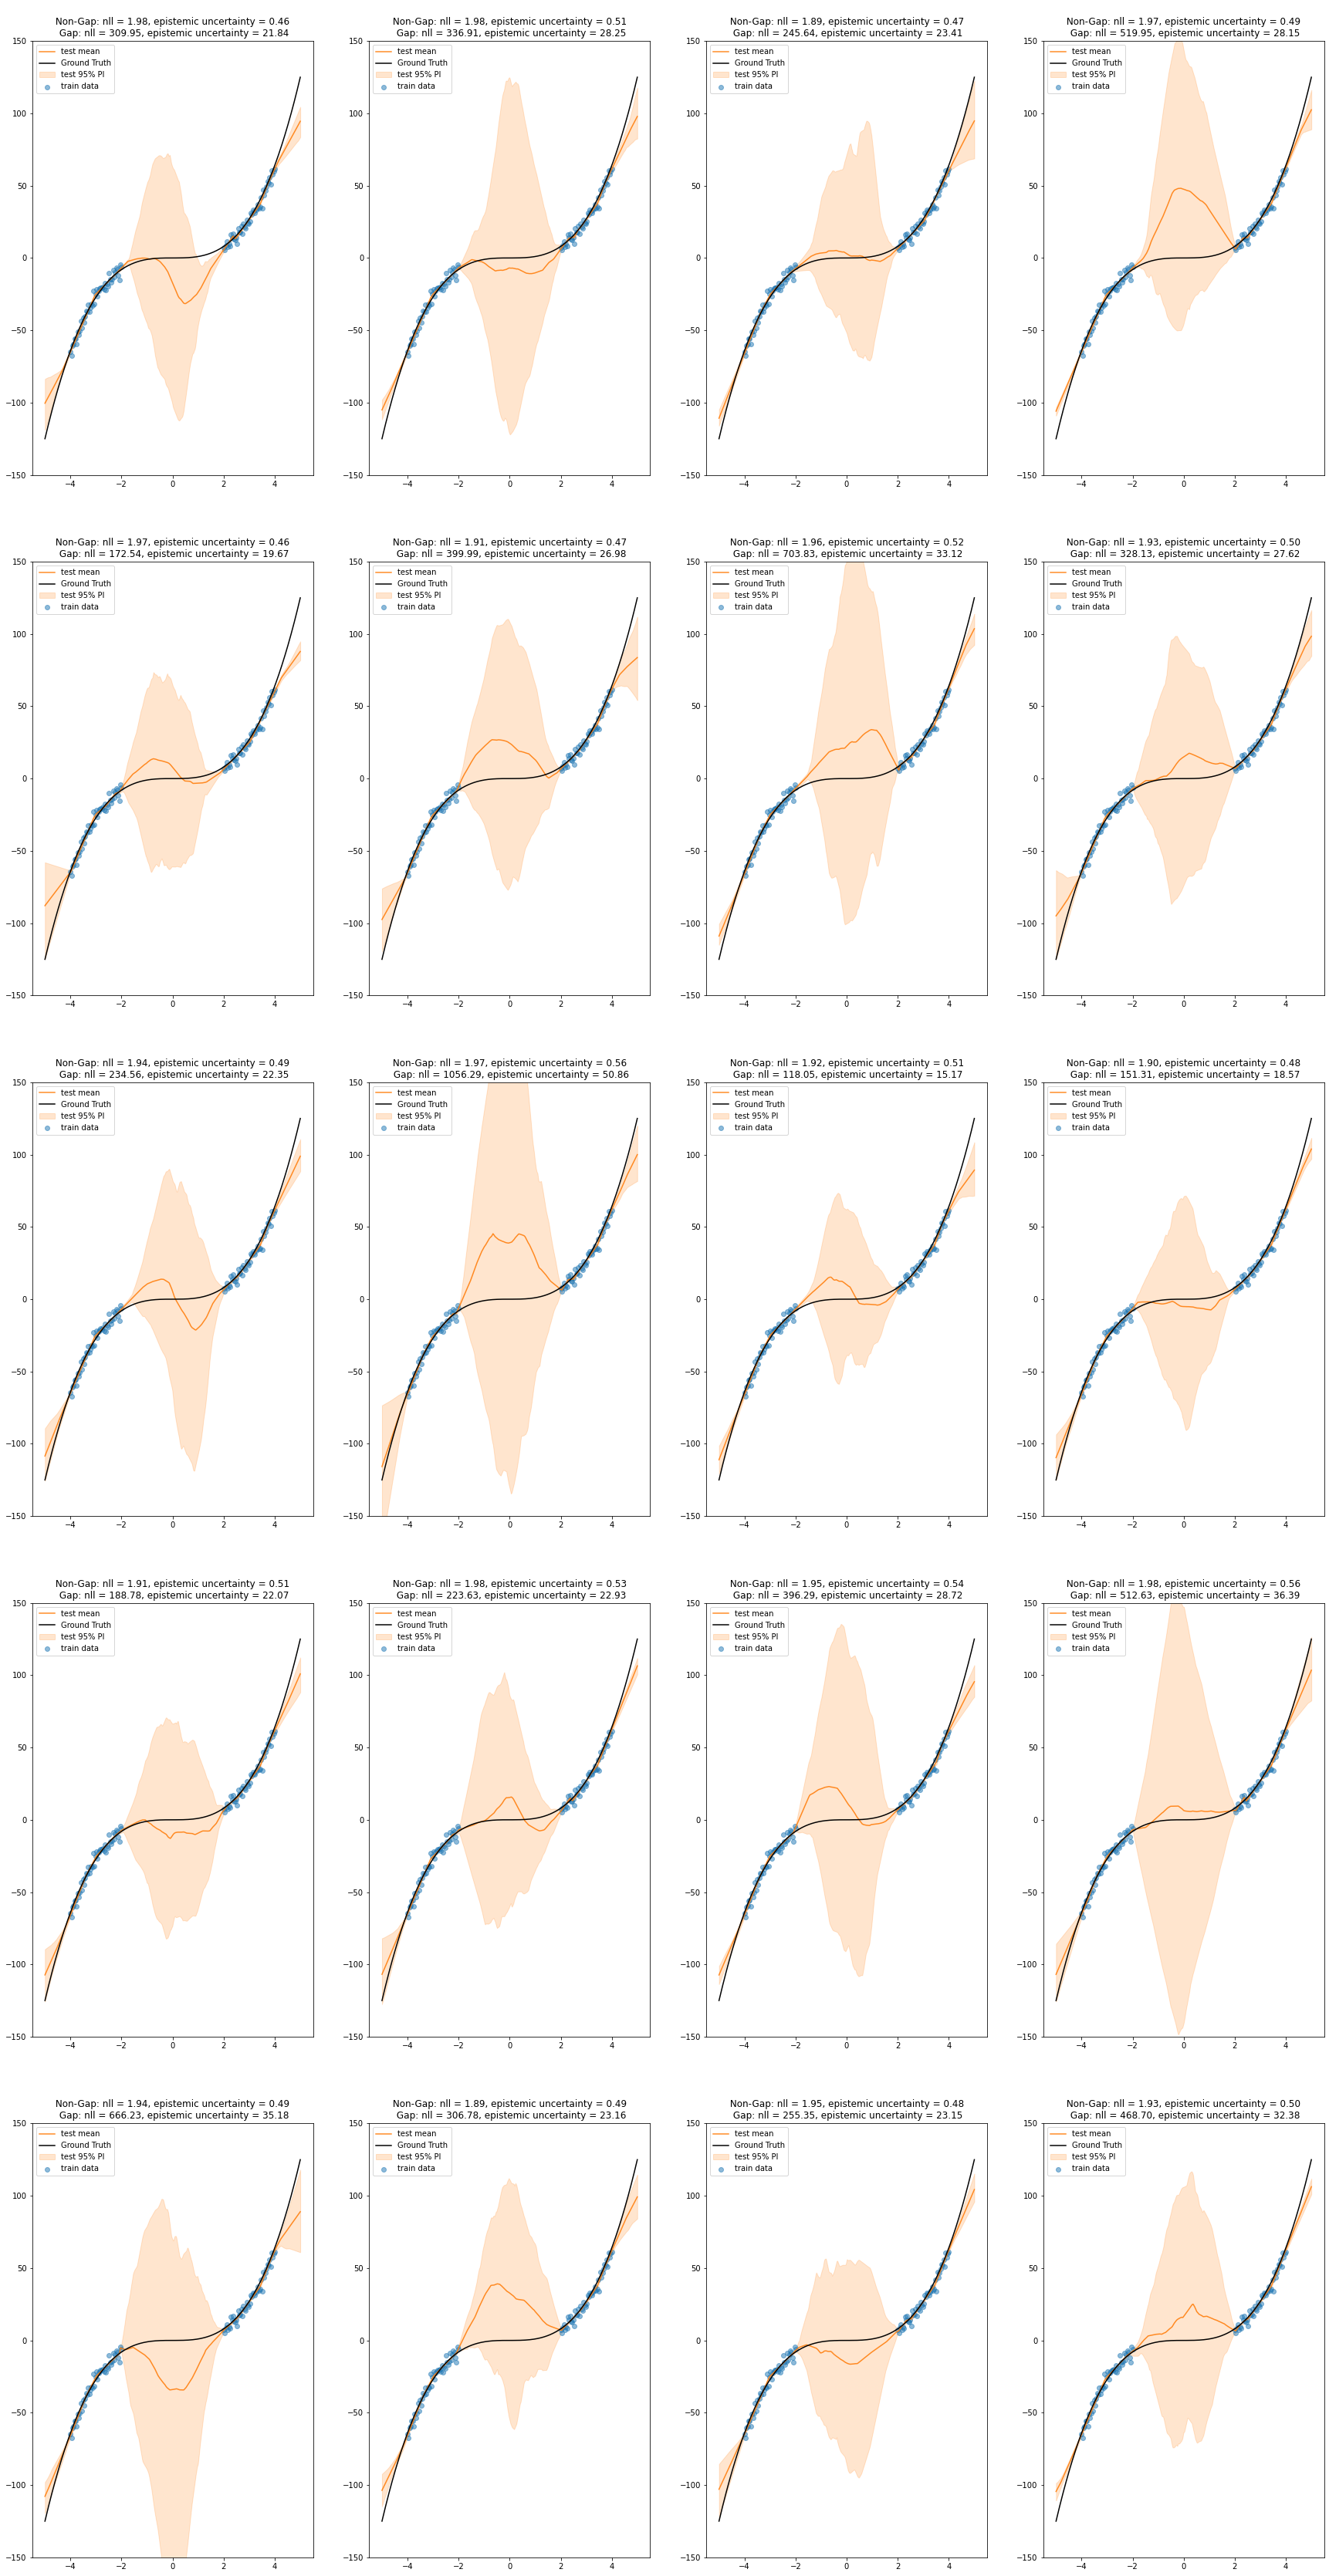

In [9]:
fig, axs = plt.subplots(5, 4, figsize = (30, 60))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    
    # Calulating percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test[0, :], pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test[0, :], pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test[0, :], x_test[0, :]**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("\n Non-Gap: nll = {:.2f}, epistemic uncertainty = {:.2f} \n Gap: nll = {:.2f}, epistemic uncertainty = {:.2f}".format(nlls_non_gap[i], eus_non_gap[i], nlls_gap[i], eus_gap[i]))

plt.show()

About 6 out of the 20 models give what we would consider good epistemic uncertainty behavior. 